In [ ]:
#*****************************************LAB1 PART3****************************************************
#           by Shivam Sahu (UBIT Name - SSAHU3)
#           Team Member Name - Individual

In [2]:
library(twitteR)
setup_twitter_oauth("4TvNeqKpfzrjy4lz7wDrR8f7f", "VvZ1uk91Xsoc30hVuRcnH3DOowOgh1Vbjp6QFGQNDb1mt25cHp", 
"766569222478573572-02R2OgdUuKqiT454C01xk4vYN1dFP9l", "5viPcLynoXxvSmu6FRDpWQ58CvKuTkoZGFIFx1lLxJwNS")
influenzaTweets1 <- searchTwitter("#influenza", n=5000) #retrieve first tweets
df1_influenzaTweets <- twListToDF(influenzaTweets1)

[1] "Using direct authentication"


In [5]:
 #<************Writing Dataframe of tweets into df1_influenzaTweets.csv file***************>   
write.csv(df1_influenzaTweets, file = "df1_influenzaTweets.csv", row.names=FALSE, na="")

In [6]:
#look up users from tweets dataframes using screenName
users.data1 <- lookupUsers(df1_influenzaTweets$screenName) 
userData1 <- twListToDF(users.data1)
userLocations1 <- userData1$location  

In [9]:
#Remove the empty location
userLocations1_clean <- userLocations1[userLocations1!='']
head(userLocations1_clean)

[1] "New York, NY"              "Guayaquil, Ecuador"       
[3] "México"                    "Cayman Islands"           
[5] "ECUADOR MANABI PORTOVIEJO" "Ecuador"

In [11]:
#convert it into data frame and save into csv
df1_userLocations1_clean <- as.data.frame(userLocations1_clean)
write.csv(df1_userLocations1_clean, file = "df1_userLocations1_clean.csv",row.names=FALSE, na="")

In [20]:
library(ggmap) 
library(ggplot2)
library(maptools)

In [31]:
#Getting long and lat of all the locations using google api(geocode)
locationdf1 <-read.csv(file="df1_userLocations1_clean.csv")
head(locationdf1)
geoloc1 <- geocode(as.character(locationdf1$userLocations1_clean))

userLocations1_clean
"New York, NY"
"Guayaquil, Ecuador"
MГ©xico
Cayman Islands
ECUADOR MANABI PORTOVIEJO
Ecuador


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=New%20York,%20NY&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Guayaquil,%20Ecuador&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=M%D0%93%C2%A9xico&sensor=false
Warning message:
“geocode failed with status ZERO_RESULTS, location = "MГ©xico"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Cayman%20Islands&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Cayman Islands"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=ECUADOR%20MANABI%20PORTOVIEJO&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Ecuador&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Bruxelles%20Ankara%20Konya&sensor=false
Warning message:
“geocode failed with st

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Loja,%20Ecuador&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Ecuador&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=North%20Vancouver,%20BC&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "North Vancouver, BC"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Singapore&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Chicago,%20IL&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Quito,%20Ecuador&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Babahoyo,%20Ecuador&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Babahoyo, Ecuador"”Information from URL : http://maps.googleapis.com

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Guayaquil,%20Ecuador&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Ecuador&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Ecuador&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Toronto,%20Ontario&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Gal%D0%93%D0%8Epagos%20&sensor=false
Warning message:
“geocode failed with status ZERO_RESULTS, location = "GalГЎpagos "”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Quito%20-%20Ecuador&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Quito - Ecuador"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Quito&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geoc

“geocode failed with status ZERO_RESULTS, location = "Vcentino Puyango Loja"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Vicentino%20Puyango%20Loja&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Ecuador&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Ecuador"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=17%20entre%20ch%20y%20d&sensor=false
Warning message:
“geocode failed with status ZERO_RESULTS, location = "17 entre ch y d"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Vicentino,%20Puyango,%20Loja%20&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Vicentino, Puyango, Loja "”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Ecuador&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Po

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Sacramento,%20CA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Sacramento, CA"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Manab%D0%93%C2%AD%20-%20Santo%20Domingo&sensor=false
Warning message:
“geocode failed with status ZERO_RESULTS, location = "ManabГ­ - Santo Domingo"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Rep.%20Dominicana&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Portoviejo&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Vienna,%20Austria&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Alberta&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Alberta"”Information from URL : http://maps.googleapis.com/maps/api

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Guayas,%20Ecuador&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Rom%20(79)&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Guayaquil,%20Ecuador&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Guayaquil,%20Ecuador&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=M%D0%93%C2%A9xico&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "MГ©xico"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Guayaquil&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Guayaquil"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Guayaquil,%20Ecuador&sensor=false
.Information from URL : http://maps.googleapis.com/maps/

“geocode failed with status OVER_QUERY_LIMIT, location = "Loja-Ecuador"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Ibarra,%20Ecuador&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=France,%20Lyon&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=venite%20gia%20risolti&sensor=false
Warning message:
“geocode failed with status ZERO_RESULTS, location = "venite gia risolti"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Ecuador&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=New%20Delhi,%20India&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Stuttgart,%20Germany&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Toronto%20%D0%BD%C2%A0%D1%98%D0%BD%C2%B7%D0%81%D0%BD%C2%A0%D1%98%D0%BD%C2%B7%C2%A6and%20Ne

.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Gustavo%20Gomez%20Azcarate%20#205&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Verona&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Home%20Town:%20Coronado,%20CA%20now%20TX&sensor=false
Warning message:
“geocode failed with status ZERO_RESULTS, location = "Home Town: Coronado, CA now TX"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=venezuela&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Manhattan,%20Kansas&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Oxford,%20UK&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Rome,%20Lazio&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Elizabeth,%20NJ&sensor=f

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Quevedo,%20Los%20Rios&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=BC&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Baltimore,%20MD&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Arquimedes%20#3,%20Piso%208,%20Polanco&sensor=false
Warning message:
“geocode failed with status ZERO_RESULTS, location = "Arquimedes #3, Piso 8, Polanco"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Gye%20Ecuador%20&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Thorofare,%20NJ&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Ecuador&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=New%20York,%20NY&sensor=false
Information f

Warning message:
“geocode failed with status ZERO_RESULTS, location = "Cold Ass, PA"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Rochester,%20MN&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Rochester, MN"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=New%20Delhi,%20India&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Leftland&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Leftland"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Germany&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Heidelberg&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=London,%20Ontario&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=ECUADOR&sensor=fa

.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=San%20Juan&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Haar,%20Deutschland&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Napoli&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=D%D0%93%D1%98sseldorf&sensor=false
Warning message:
“geocode failed with status ZERO_RESULTS, location = "DГјsseldorf"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Hochtaunuskreis,%20Hessen&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Ulm&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Online&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Online"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Sto

Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Vancouver, BC"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Ecuador&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Imbabura&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Copiap%D0%93%D1%96,%20Atacama,%20Chile&sensor=false
Warning message:
“geocode failed with status ZERO_RESULTS, location = "CopiapГі, Atacama, Chile"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=santiago%20de%20chile&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Georgia&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Providencia,%20Chile&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Concepci%D0%93%D1%96n,%20Chile%D0%BD%C2%A0%D1%98%D0%BD%C2%B7%D0%

.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Denmark%20&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Pi%D0%93%C2%B1as,%20Ecuador&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "PiГ±as, Ecuador"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Ontario,%20Canada&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Guayas,%20Ecuador&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Ecuador&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Macroom,%20Cork&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=BABAHOYO%20-%20ECUADOR&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=WhereEverIWant2B&sensor=false
Warning message:
“ge

.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Mexico&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Chemnitz&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Vineland,%20NJ&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Florida,%20USA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Peglio%20(PU)&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Rhein-Sieg-Kreis%20(NRW)&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Rhein-Sieg-Kreis (NRW)"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Deutschland&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Quito-Ecuador&sensor=false
.Information from URL : http://maps.google

.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=North%20Carolina,%20USA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "North Carolina, USA"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Hungary&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Barcelona,%20Catalonia&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Bud%20Bath%20and%20Beyond&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=New%20Delhi,%20India&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Victoria,%20Tamaulipas&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Fountain%20Valley,%20CA&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Utah,%20USA&sensor=f

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Sacramento,%20CA%20~%20Nazi%20Amerika&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Sacramento, CA ~ Nazi Amerika"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=United%20States&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "United States"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Eco-Logical%20Network,%20LA%20Metro&sensor=false
Warning message:
“geocode failed with status ZERO_RESULTS, location = "Eco-Logical Network, LA Metro"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Guayaquil-Ecuador&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Germany&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Katy,%20TX&sensor=false
Information f

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=England,%20United%20Kingdom&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Mississippi,%20USA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Gobierno%20Zonal%20de%20Guayaquil&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Pompei%20(Na)&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Pompei (Na)"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Italy&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Vienna,%20Austria&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Logan,%20Queensland,%20Australia%20&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Donostia-San%20Sebasti

.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Vancouver,%20British%20Columbia&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=North%20Carolina,%20USA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=mexico%20df.&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Dexter,%20MO&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Guayas%20-%20Ecuador&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Silverdale,%20WA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=EstadioMonumental%D0%B2%E2%84%A2%D2%90&sensor=false
Warning message:
“geocode failed with status ZERO_RESULTS, location = "EstadioMonumentalв™Ґ"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Athens&sensor=f

.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Guayaquil%20-%20Ecuador&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Fort%20Worth,%20TX&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Fort Worth, TX"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Cagliari,%20Sardinia&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Sardegna,%20Italia&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Rome,%20Lazio&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=rome,italy&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Milano%20-%20ITALIA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Milano - ITALIA"”Information from URL : http://maps.g

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Via%20della%20Dataria,%2094%20-%20Roma&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Via della Dataria, 94 - Roma"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Pantelleria%20Italy&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Pantelleria Italy"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=East%20Hampton,%20NY&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Ecuador%20&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Ecuador "”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=NKRI,%20Bumi%20Allah&sensor=false
Warning message:
“geocode failed with status ZERO_RESULTS, location = "NKRI, Bumi Allah"”.Information from URL : http://maps.googleapis.co

Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Philadelphia, PA"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Richardson,%20TX&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=City%20of%20River%20Oaks&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "City of River Oaks"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Italy&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Headquarters%20in%20Fort%20Worth,%20TX&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Vancouver,%20BC&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Vancouver, BC"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Naucalpan%20de%20Ju%D0%93%D0%8Erez,%20M%D0%93%C2%A9xico&sensor=false
Warn

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Spain&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Spain"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=San%20Carlos-Zamora-Zamora%20Ch.&sensor=false
Warning message:
“geocode failed with status ZERO_RESULTS, location = "San Carlos-Zamora-Zamora Ch."”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Gainesville,%20FL&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Cambridge,%20England&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Ruhrgebiet&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Ruhrgebiet"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Santiago%20de%20Chile&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=100%20W.%20Broadway%20Frankfort,%20KY&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Portland,%20Maine&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Portland, Maine"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Made%20in%20Scarborough&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Peace%20Country,%20AB&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=La%20Mana%20-%20Cotopaxi%20-%20Ecuador&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Wales,%20United%20Kingdom&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Wales, United Kingdom"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Chil

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Lombardia,%20Italia&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Lombardia, Italia"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Wilayah%20Persekutuan%20Kuala%20Lump&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Barbones%20&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=%D0%B9%D1%9C%E2%84%A2%D0%B5%D0%86%D0%8E%D0%B7%D1%9A%D0%8A&sensor=false
Warning message:
“geocode failed with status ZERO_RESULTS, location = "йќ™еІЎзњЊ"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Willowbrook%20IL&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=California&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Canada%20&sensor=false
Informat

“geocode failed with status ZERO_RESULTS, location = "My Kingdom"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=@northeastern%20&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Montreal,%20Quebec&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Washington%20DC&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Milano&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Manabita,%20de%20Calceta&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Sucumb%D0%93%C2%ADos%20&sensor=false
Warning message:
“geocode failed with status ZERO_RESULTS, location = "SucumbГ­os "”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Leixlip%20Ireland&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?a

In [32]:
head(geoloc1)

lon,lat
-74.00597,40.712775
-79.92236,-2.170998
NA,NA
NA,NA
-80.45249,-1.054723
-78.18341,-1.831239


In [34]:
#<************Writing geolocation into geoloc1.csv file***************> 
write.csv(geoloc1, file = "geoloc1.csv",row.names=FALSE, na="")

In [1]:
library(twitteR)
setup_twitter_oauth("4TvNeqKpfzrjy4lz7wDrR8f7f", "VvZ1uk91Xsoc30hVuRcnH3DOowOgh1Vbjp6QFGQNDb1mt25cHp", 
"766569222478573572-02R2OgdUuKqiT454C01xk4vYN1dFP9l", "5viPcLynoXxvSmu6FRDpWQ58CvKuTkoZGFIFx1lLxJwNS")
influenzaTweets2 <- searchTwitter("#flu", n=5000) #retrieve first tweets
df2_influenzaTweets <- twListToDF(influenzaTweets2)

[1] "Using direct authentication"


In [2]:
 #<************Writing Dataframe of tweets into df2_influenzaTweets.csv file***************>   
write.csv(df2_influenzaTweets, file = "df2_influenzaTweets.csv", row.names=FALSE, na="")

In [3]:
#look up users from tweets dataframes using screenName
users.data2 <- lookupUsers(df2_influenzaTweets$screenName) #look up users from tweets dataframes
userData2 <- twListToDF(users.data2)
userLocations2 <- userData2$location  

In [4]:
#Remove the empty location
userLocations2_clean <- userLocations2[userLocations2!='']
head(userLocations2_clean)

[1] "NYC"                      "Nevada"                  
[3] "West and Central Florida" "Nevada, MO"              
[5] "Maryland, USA"            "USA"

In [5]:
#convert it into data frame and save into csv
df2_userLocations2_clean <- as.data.frame(userLocations2_clean)
write.csv(df2_userLocations2_clean, file = "df2_userLocations2_clean.csv",row.names=FALSE, na="")

In [8]:
#Getting long and lat of all the locations using google api(geocode)
library(ggmap) 
library(ggplot2)
library(maptools)
locationdf2 <-read.csv(file="df2_userLocations2_clean.csv")
head(locationdf2)
geoloc1 <- geocode(as.character(locationdf2$userLocations2_clean))

userLocations2_clean
NYC
Nevada
West and Central Florida
"Nevada, MO"
"Maryland, USA"
Western NY


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=NYC&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "NYC"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Nevada&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=West%20and%20Central%20Florida&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Nevada,%20MO&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Maryland,%20USA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Western%20NY&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Western NY"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Minneapolis,%20MN&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Minne

.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Connecticut&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Connecticut"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Lehigh%20Valley,%20PA/NJ&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Wolters%20Kluwer%20Health&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=York,%20PA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Fort%20Worth,%20TX&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Hillcrest,%20San%20Diego&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Hillcrest, San Diego"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Bronx,%20NY&sensor=false
Information from URL : http://m

.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Wakanda&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Bad%20Wildbad,%20Deutschland&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Hungary&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Pennsylvania,%20USA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Markham%20ON,%20L3R%201C2%20Canada&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Rhode%20Island,%20USA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Rhode Island, USA"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Onawa,%20Iowa&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Onawa, Iowa"”Information from URL : http:

Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Ames, IA"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Kingston,%20RI&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=The%20Woodlands,%20TX%2077380&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Staffordshire&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=220%20Essie%20Davison,%20Clarinda%20IA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Flower%20Mound,%20TX&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Flower Mound, TX"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Knoxville,%20TN&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Glasgow%20Scotland%20Europe%20&sensor=false
.

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Miami,%20FL&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Columbus,%20OH&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Columbus,%20Ohio&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Ohio,%20USA&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Boston,%20MA&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=New%20York,%20NY&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "New York, NY"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Indianapolis,%20IN&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Tampa,%20Florida&sensor=false
Information from URL : http://maps.googl

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Texas,%20USA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Texas, USA"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Maine&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Maine"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Lincoln%20Nebraska&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Rutgers%20and%20UCSD/SDSC&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Rutgers and UCSD/SDSC"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Washington,%20DC&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Houston,%20TX&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "

.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=NC&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "NC"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Kingston,%20Rhode%20Island&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Kingston, Rhode Island"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Earth&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Earth"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Rosemont,%20PA%20%2019010%20&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Rosemont, PA  19010 "”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=NY,%20NY&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Wuhan,%20China&senso

.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Concepci%C3%B3n,%20Chile&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Saratoga%20Springs,%20NY&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Makati%20City,%20Philippines&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=6%20hough%20lane,%20leyland%20PR25%202SD&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=New%20York,%20NY&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Atlanta%20GA&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=overtown%20nth%20lanarkshire&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Bracknell%20Forest,%20Berks,%20UK.&sensor=false
Information from URL : http://maps.go

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Minneapolis,%20MN&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Minneapolis, MN"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Madison,%20WI&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=SoCal&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Pennsylvania,%20USA&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Mission%20Viejo,%20CA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Marion,%20Va&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Marion, Va"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Salisbury,MD&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/g

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Washington,%20USA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Washington, USA"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Salinas,%20CA&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Dover,%20DE&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Dover, DE"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=New%20York,%20NY&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Boston%20area&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Newcastle%20upon%20Tyne,%20U.K.&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Lexington,%20Kentucky&sensor=false
.Information from URL : http://maps.goo

.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Atlanta,%20GA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Texas,%20USA&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Atlanta,%20Georgia&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Francistown,%20Botswana&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Michigan,%20USA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Southern%20Indiana%20&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Lovejoy,%20GA,%20USA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Franklin,%20TN&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Fergus%20Falls,%20MN&sensor=f

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=New%20York&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Portland&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Portland"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=London,%20New%20York%20and%20Shanghai&sensor=false
Warning message:
“geocode failed with status ZERO_RESULTS, location = "London, New York and Shanghai"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Street%20Music&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Florida&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=America&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Chicago,%20Illinois&sensor=false
Warning message:
“geocode failed with status OVER

.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Oklahoma,%20USA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Espa%C3%B1a%20&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Grand%20Ledge&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Grand Ledge"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Houston,%20TX&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=chicago&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=The%20OTHER%20Vancouver--WA%20State&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Willows,%20CA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Willows, CA"”.Information from URL : http://maps.googleapis.com/m

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Virginia&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=New%20York,%20NY&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Americus,%20GA&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Henderson,%20NV&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=New%20York%20State&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Los%20Angeles,%20CA&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Fresno,%20CA%20North%20Fork,%20CA&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Vale%20of%20York,%20UK&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Vale of York, UK"”Infor

.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Harlem,%20New%20York&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Harlem, New York"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=California,%20USA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "California, USA"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Normal,%20IL&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=random%20thoughts&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "random thoughts"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Mayfair(London),%20Midtown(NYC)&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=who%20knows&sensor=false
Information from URL : http://maps.googleapis.

.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Miami&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=New%20Orleans,%20LA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=San%20Antonio,TX%20/%20MIAMI%20#305&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=California,%20USA&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Hoosier&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Hoosier"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Riyadh,%20Kingdom%20of%20Saudi%20Arabia&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Atlanta,%20GA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Atlanta, GA"”.Information from URL : http://

.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=North%20Wales&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Harlem,%20NY&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Hoffman%20Estates,%20IL&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Hoffman Estates, IL"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Sharon,%20MA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Sharon, MA"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Global%20from%20Australia&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Huntsville,%20AL&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=West%20Hurley,%20NY&sensor=false
Information from URL : http://maps.

.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=MINAS%20GERAIS%20-%20BR&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Ottawa,%20Ontario&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Papua,%20Indonesia&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Rio%20de%20Janeiro,%20Brasil&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Rio%20de%20Janeiro,%20Brasil&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Miami%20Beach,%20FL&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Puta%20Queo%20Pariu%20-%20Erre%20Jota&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Puta Queo Pariu - Erre Jota"”.Information from URL : http://maps.googleapis.com/maps/api/geoc

.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Los%20Angeles,%20CA&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Petr%C3%B3polis,%20Brasil&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Charlotte,%20NC&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Brooklyn,%20NY&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=New%20York&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Calgary,%20Ab.%20Canada&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Portland,%20Oregon&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=North%20Richland%20Hills,%20TX&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Austin,%

“geocode failed with status OVER_QUERY_LIMIT, location = "Fort Worth, Texas"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Henderson,%20NV&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Bronx,%20NY&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Bronx, NY"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Dallas/Fort%20Worth&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Eindhoven&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Eindhoven"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Rochester,%20NY&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Rochester, NY"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Orange%20County,%20California&sensor=f

.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Worldwide&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Worldwide"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=USA%20&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Tennessee&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Victoria,%20Australia&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=North%20Carolina&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "North Carolina"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Flu-Sick%20USA%20&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Toronto,%20Ontario&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geoc

Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Interstellar"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Wolfville,%20Nova%20Scotia&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Wolfville, Nova Scotia"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Kampala,%20Uganda&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Helsinki,%20Suomi&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Cyprus&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Little%20Rock,%20AR&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Little Rock, AR"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Riyadh&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT,

Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Louisville, ky"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Limerick%20PA&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Wollongong,%20New%20South%20Wales&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Georgia,%20USA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Georgia, USA"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Reno,%20NV&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Brisbane,%20Australia&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Brisbane, Australia"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Cameroon%20&sensor=false
Warning message:
“geocode failed with status OVER_QUE

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Kentucky&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Kentucky"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Milky%20Way%20%7C%20Earth%20%7C%20Canada&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Southern%20California&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Chicago,%20IL%20USA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Orangeville,%20Ontario&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Downtown%20Memphis,%20TN&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=near%20Pittsburgh&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "near Pittsburgh"”.Informatio

Warning message:
“geocode failed with status ZERO_RESULTS, location = " TX
Ottawa
Haskell"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=%20OK%0ANew%20York&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=%20NY%0ANew%20York&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=%20New%20York%0ANYC%0ADeerfield%20Beach%20Florida%0ABuffalo&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=%20NY%0ACleveland&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = " NY
Cleveland"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=%20OH%0AOxford&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=%20UK%0AHarrisburg&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=%20PA%0AAtlanta%0AAlaska/Idah

Providence"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=%20RI%0AWest%20Warwick&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=%20Rhode%20Island%0AWashington&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = " Rhode Island
Washington"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=%20DC%0AStamford&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=%20CT%0AIndianola&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = " CT
Indianola"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=%20IA%0AWaterloo&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=%20Iowa%0AIowa%0ALas%20Vegas&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=%20NV%0AWorld%20Wide

Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = " Morelos
EU | UK | US
Thousand Oaks"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=%20CA%0ASt.%20George%0ANorth%20Carolina&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=%20USA%0AVermont&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=%20USA%0ATucson&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=%20AZ%0APuget%20Sound%20Region%0ALos%20Angeles&sensor=false
Warning message:
“geocode failed with status ZERO_RESULTS, location = " AZ
Puget Sound Region
Los Angeles"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=%20CA%0ASan%20Francisco&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = " CA
San Francisco"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?add

Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "clinic"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=tennis%20court%0ANashville%0AOak%20Ridge&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=%20TN%0ABetween%20RVA%20and%20Cville%0ACompton&sensor=false
Warning message:
“geocode failed with status ZERO_RESULTS, location = " TN
Between RVA and Cville
Compton"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=%20California%0AGloucester%20&%20Beverly%20MA%0AWestbury&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=%20NY%0ASilver%20Spring&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=%20Maryland%0AIllinois&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=%20USA%0ABremerton&sensor=false
Warning message:
“geocode failed with 

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=%20Maryland%0ANorthern%20California%0ASan%20Antonio&sensor=false
Warning message:
“geocode failed with status ZERO_RESULTS, location = " Maryland
Northern California
San Antonio"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=%20TX%0AVilla%20Elisa&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=%20Argentina%0AOttawa&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=%20Ontario%0ASan%20Francisco&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=%20Bay%20Area%0ABoston&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=%20MA%0AOttawa%0ACalgary&sensor=false
Warning message:
“geocode failed with status ZERO_RESULTS, location = " MA
Ottawa
Calgary"”Information from URL : http://maps.googleapis.com/maps/api/geoc

Warning message:
“geocode failed with status ZERO_RESULTS, location = " USA
Abu Dhabi
PhiLOVEdelphia
Ithaca"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=%20NY%0AThorofare&sensor=false
Warning message:
“geocode failed with status ZERO_RESULTS, location = " NY
Thorofare"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=%20NJ%0ARichmond&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=%20VA%0AMEDIA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = " VA
MEDIA"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=%20Pa.%0AGlasgow&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = " Pa.
Glasgow"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=%20Scotland%0A%C3%9CT:%2033.522984&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/g

HQ: Phoenix"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=%20AZ%0ABeirut&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=%20Lebanon%0ALawrence&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=%20KS%0ABaltimore&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=%20MD%0AAtlanta&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=%20GA%0AMaryland&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=%20USA%0AMinneapolis%20&%20Chicago%0AUK&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=%20France&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=%20North%20America&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=%20S

.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=%20AZ%0AAtlanta&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=%20GA%0ANew%20Jersey%0ACambridge/London%0ADenver&sensor=false
Warning message:
“geocode failed with status ZERO_RESULTS, location = " GA
New Jersey
Cambridge/London
Denver"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=%20CO%0ANorthbrook&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = " CO
Northbrook"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=%20IL%0ALagos&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=%20Nigeria%0ALake%20County&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=%20Illinois%0ATX%20%E2%86%92%20DC%0AColumbus&sensor=false
Warning message:
“geocode failed with status ZERO_RESULTS, locatio

Warning message:
“geocode failed with status ZERO_RESULTS, location = " London
Swaziland
Dorset
Sheltered In The Arms Of #GOD!
New Delhi
Paris"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=%20France%0A%CE%91%CE%B3%CF%81%CE%AC%CF%86%CF%89%CE%BD%203-5&sensor=false
Warning message:
“geocode failed with status ZERO_RESULTS, location = " France
Αγράφων 3-5"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=%20%CE%9C%CE%B1%CF%81%CE%BF%CF%8D%CF%83%CE%B9&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = " Μαρούσι"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=%2015123%0ANewburyport&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=%20Ma%0ADallas&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = " Ma
Dallas"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?a

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=%20Ohio%0AMexico%0AEnid&sensor=false
Warning message:
“geocode failed with status ZERO_RESULTS, location = " Ohio
Mexico
Enid"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=%20OK%0AThorofare&sensor=false
Warning message:
“geocode failed with status ZERO_RESULTS, location = " OK
Thorofare"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=%20NJ%0AIn%20the%20Heart%20of%20@DevinAI12%0Aeverett&sensor=false
Warning message:
“geocode failed with status ZERO_RESULTS, location = " NJ
In the Heart of @DevinAI12
everett"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=%20wa%0A%D8%AD%D9%8A%D8%AB%20%D8%A3%D9%86%D8%A7%0A37421%0APalo%20Alto&sensor=false
Warning message:
“geocode failed with status ZERO_RESULTS, location = " wa
حيث أنا
37421
Palo Alto"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?add

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Philadelphia,%20PA&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Philadelphia,%20PA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Philadelphia, PA"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=US:%2045.427650,-75.691070&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "US: 45.427650,-75.691070"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Big%20Sky%20Country&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Waxahachie,%20TX%20%7C%20972-937-1640&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Houston,%20Texas%20&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Charlotte,%20NC&senso

.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=San%20Carlos,%20CA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=University%20Park,%20PA&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Sacramento,%20CA&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=New%20York,%20NY&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=San%20Diego,%20CA&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Scottsdale,%20AZ&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Nebraska,%20USA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Nebraska, USA"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=San%20Diego,%20CA&sensor=false
Warning messag

In [9]:
head(geoloc1)

lon,lat
NA,NA
-116.41939,38.80261
-87.28459,39.62265
-94.35467,37.83921
-76.64127,39.04575
NA,NA


In [10]:
write.csv(geoloc1, file = "geoloc2.csv",row.names=FALSE, na="")

In [1]:
library(twitteR)
setup_twitter_oauth("4TvNeqKpfzrjy4lz7wDrR8f7f", "VvZ1uk91Xsoc30hVuRcnH3DOowOgh1Vbjp6QFGQNDb1mt25cHp", 
"766569222478573572-02R2OgdUuKqiT454C01xk4vYN1dFP9l", "5viPcLynoXxvSmu6FRDpWQ58CvKuTkoZGFIFx1lLxJwNS")
influenzaTweets3 <- searchTwitter("#influenza", n=5000) #retrieve first tweets
df3_influenzaTweets <- twListToDF(influenzaTweets3)

[1] "Using direct authentication"


In [2]:
 #<************Writing Dataframe of tweets into df3_influenzaTweets.csv file***************>   
write.csv(df3_influenzaTweets, file = "df3_influenzaTweets.csv", row.names=FALSE, na="")

In [3]:
#look up users from tweets dataframes using screenName
users.data3 <- lookupUsers(df3_influenzaTweets$screenName) #look up users from tweets dataframes
userData3 <- twListToDF(users.data3)
userLocations3 <- userData3$location  

In [4]:
#Remove the empty location
userLocations3_clean <- userLocations3[userLocations3!='']
head(userLocations3_clean)

[1] "United States"       "Vermont, USA"        "Ciudad de México"   
[4] "Global"              "Portoviejo, Ecuador" "Galveston, TX"

In [5]:
#convert it into data frame and save into csv
df3_userLocations3_clean <- as.data.frame(userLocations3_clean)
write.csv(df3_userLocations3_clean, file = "df3_userLocations3_clean.csv",row.names=FALSE, na="")

In [9]:
#Getting long and lat of all the locations using google api(geocode)
library(ggmap) 
library(ggplot2)
library(maptools)
locationdf3 <-read.csv(file="df3_userLocations3_clean.csv")
head(locationdf3)
geoloc3 <- geocode(as.character(locationdf3$userLocations3_clean))

userLocations3_clean
United States
"Vermont, USA"
Ciudad de México
Global
"Portoviejo, Ecuador"
"Galveston, TX"


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=United%20States&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Vermont,%20USA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Ciudad%20de%20M%C3%A9xico&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Ciudad de México"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Global&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Portoviejo,%20Ecuador&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Galveston,%20TX&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Galveston, TX"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=University%20of%20Maryland&sensor=false
Warning message:
“geocode failed with

Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Cuenca "”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Loja&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Vancouver,%20British%20Columbia&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Tampa,%20FL&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Fort%20Collins,%20Colorado&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Babahoyo&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Hobart,%20Tasmania&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Scottsdale,%20AZ&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Bolzano,%20Trentino-South%20Tyrol&sensor=false
Warning messa

Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Santiago, Chile"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Ecuador&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Manchester,%20UK&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Esmeraldas&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Guayaquil,%20Ecuador&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=USA&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Dortmund&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Lomas%20De%20Sargentillo,%20Ecuador&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Arese,%20Strada%20della%20Moia,%201&sensor=false
.Information from

.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=United%20Kingdom&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Global%20network&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Arica,%20Chile.&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Guaranda,%20Ecuador&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Toronto&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Ballarat,%20Victoria&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Malmo,%20Sweden&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Malmo, Sweden"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Tennessee,%20USA&sensor=false
Information from URL : http:/

“geocode failed with status OVER_QUERY_LIMIT, location = "Guayas, Ecuador"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Guayaquil,%20Ecuador&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Guayaquil, Ecuador"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Quevedo,%20Ecuador&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Ciudad%20de%20M%C3%A9xico&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Navojoa,%20Sonora&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Limerick,%20Ireland&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Manhattan,%20NY&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Manhattan, NY"”.Information from URL : http://maps.googleapis.com/maps/api

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Houston,%20TX&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Houston, TX"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Ecuador&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Ecuador"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Ecuador&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Babahoyo,%20Ecuador&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Ecuador&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Wuppertal,%20Nordrhein-Westfalen&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Salzbergen&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/jso

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Sarnia,%20Ontario&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Kansas%20City,%20MO&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=M%C3%BCnchen,%20Bayern&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=J.%20Mar%C3%ADa/Chorrillos%20Lima,%20Per%C3%BA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "J. María/Chorrillos Lima, Perú"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Baton%20Rouge,%20LA&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Hamburg,%20Germany&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=International&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?addres

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Indiana&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Antonio%20Ante,%20Ecuador&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Planet%20Earth&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Nepal&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Basel,%20Switzerland&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Guayaquil,%20Ecuador%20&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Iquique-Chile&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Iquique-Chile"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Quito,%20Ecuador&sensor=false
.Information from URL : http://

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=PNW&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Rockville,%20MD&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Rockville,%20MD&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Rockville, MD"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Pichincha,%20Ecuador&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Canada&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Baltimore&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Morelos,%20M%C3%A9xico&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Loja,%20Ecuador&sensor=false
Information from URL : http://maps.googleapis.com

Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Pichincha, Ecuador"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Chile%20&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=zapotillo&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Cayambe,%20Ecuador&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Mumbai,%20India&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=SANTIAGO%20CHILE!&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Trieste&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Orellana,%20Ecuador&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Cambridge,%20MA,%20USA&sensor=false
Information from URL : http://maps

.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Ottawa,%20Ontario&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Big%20Canoe%20~%20North%20Georgia%20Mountains&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Big Canoe ~ North Georgia Mountains"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Thorofare,%20NJ&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Bucks%20County,%20Pennsylvania&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Illinois&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Illinois"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Valpara%C3%ADso,%20Chile&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Sacramento,%20CA&

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=San%20Juan,PR&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Catamayo&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=venite%20gia%20risolti&sensor=false
Warning message:
“geocode failed with status ZERO_RESULTS, location = "venite gia risolti"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Salina,%20KS/Simi%20Valley,%20CA&sensor=false
Warning message:
“geocode failed with status ZERO_RESULTS, location = "Salina, KS/Simi Valley, CA"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Loja,%20Ecuador&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Mumbai,%20India&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Mumbai, India"”.Information from URL : http://maps.googleapis.co

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Munich,%20Bavaria&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Chaguarpamba,%20Ecuador&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Chaguarpamba, Ecuador"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Potsdam&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Macar%C3%A1-Loja-Ecuador&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Macara,%20Ecuador&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Provincias%20Llanquihue,%20Chilo%C3%A9%20y%20Palena&sensor=false
Warning message:
“geocode failed with status ZERO_RESULTS, location = "Provincias Llanquihue, Chiloé y Palena"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Stratf

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Bengaluru,%20India&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=India&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "India"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=India&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "India"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Bengaluru,%20India&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=mumbai%20India&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "mumbai India"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Bradford,%20UK%20&%20Tianjin,%20China&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Bradford

Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "ホセ·マヌエル·ベルガラ"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Chiguayante,%20Chile&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Chiguayante, Chile"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=%C3%9CT:%20-23.006344,-43.316068&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Coquimbo,%20Chile&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Austin&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=United%20States&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "United States"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Los%20Angeles,%20California&sensor=false
Warning message:
“geocode failed with stat

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Arizona,%20USA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Kaduna,%20Nigeria&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Germany,%20Mainz&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Germany, Mainz"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Miami,%20FL&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Mexico&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Geneva,%20Switzerland&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=World&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Bruxelles&sensor=false
Information from URL : http://maps.googleapis.com/maps/api

.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=world%20wide&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "world wide"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Kiel,%20Schleswig-Holstein&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Kiel, Schleswig-Holstein"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Kolkata%20%7C%20New%20Delhi%20%7C%20Mumbai&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Tonbridge,%20South%20East&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Chaguarpamba,%20Ecuador&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Chaguarpamba, Ecuador"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Macara,%20Ecuador&sensor=false
Inf

.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Hanoi,%20Viet%20Nam&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Hanoi, Viet Nam"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Ecuador_%20azogues&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Ecuador_ azogues"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Dammam%20&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Dammam "”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Canada&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Canada"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Mission%20Viejo,%20CA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Lorain,%20OH&sensor=fa

.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Brazil&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Brazil"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Durham,%20Ontario&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Espa%C3%B1a&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Le%C3%B3n,%20Guanajuato&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=New%20York&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Honolulu,%20HI&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=New%20York%20&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Tsukuba,%20Ibaraki&sensor=false
Information from URL : http://maps.googleapis.com

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Cuenca,%20Ecuador&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Greenwich,%20CT&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Mineral%20de%20la%20Reforma,%20Hidalgo&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Mineral de la Reforma, Hidalgo"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Santa%20Elena&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Canada&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Loja&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Boston,%20Massachusetts%20&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Chile&sensor=false
Information f

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Macroom,%20Cork&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Pachuca%20Hidalgo&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Paese%20delle%20Meraviglie&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Loja-Ecuador&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Florida,USA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Los%20Rios,%20Ecuador&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Santiago%20de%20Chile%20&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Carretera%20M%C3%A9xico%20-Pachuca%20km.&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Carre

.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=phoenix,%20Arizona&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "phoenix, Arizona"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Burlington,%20Ontario&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Bra%20(CN)&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Liverpool%20-%20UK&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Italy&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Your%20Head&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Ecuador&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Washington,%20D.C.&sensor=false
Warning message:
“geocode failed with statu

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Bari&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=sicily,%20italy&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "sicily, italy"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Hyderabad,%20India&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Atlanta,%20GA&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Sagunto,%20Spain&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Get%20a%20Warrant&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Mexico%20City,%20CDMX&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Navojoa,%20Sonora&sensor=false
.Information from URL : http://map

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Cuenca,%20Ecuador&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Mainz,%20Germany&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Houston,%20TX&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Roma&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Dallas/Fort%20Worth,%20TX&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Las%20Vegas&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Las Vegas"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Cangonama&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Cangonama"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?

.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Germany&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Florida,%20USA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Ecuador&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Quer%C3%A9taro,%20M%C3%A9xico&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Work%20in%20South%20East%20London&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Work in South East London"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Wien&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Wien"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Malta&sensor=false
.Information from URL : http://maps.googleapis.com/maps/

Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Hermosillo, Sonora"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Marina%20del%20Rey,%20CA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Marina del Rey, CA"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Phoenix%20AZ&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Sonora%20&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=chile&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "chile"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Sonora,%20M%C3%A9xico&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Geneva,%20Switzerland&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/j

Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Punta Arenas, Chile"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Puerto%20Montt&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Madrid,%20Espa%C3%B1a&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Espa%C3%B1a%20&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Loja&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Loja"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=London,%20England&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "London, England"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Chile&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=%C3%B1u%

.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Around%20the%20World&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Market%20Harborough&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Guadalajara,%20Jalisco&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Guadalajara, Jalisco"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Herzogenrath&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Herzogenrath"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Aachen&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=United%20Kingdom&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "United Kingdom"”Information from URL : http://maps.googleapis.com/maps/api/ge

Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Santiago, Chile"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Venus%20&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=US&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Chaguarpamba,%20Ecuador&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Pelequ%C3%A9n,%20O'higgins,%20Chile&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Pelequén, O'higgins, Chile"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=@Capsproduccione&sensor=false
Warning message:
“geocode failed with status ZERO_RESULTS, location = "@Capsproduccione"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Colorado,%20USA&sensor=false
Warning message:
“geocode failed with status OVER

Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Loja, Ecuador"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Ottawa%20Ontario%20Canada&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Pachuca%20de%20Soto,%20Hidalgo&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Berlin&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Normal,%20IL&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=quevedo-ecuador&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Loja,%20Ecuador&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Geneva,%20Switzerland&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=CBIB%20UNAB&sensor=false
Warning message:
“g

Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Antofagasta, Chile"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=chile&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "chile"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Roma%20y%20Barcelona&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Santiago%20Metropolitan%20Region&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Santiago Metropolitan Region"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Santiago%20de%20Chile&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Arica-Chilee&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Loja,%20Ecuador&sensor=false
Warning message:
“geocode failed with status O

In [11]:
head(geoloc3)

lon,lat
-95.71289,37.090240
-72.57784,44.558803
NA,NA
-83.98110,34.114050
-80.45249,-1.054723
NA,NA


In [12]:
write.csv(geoloc3, file = "geoloc3.csv",row.names=FALSE, na="")

In [13]:
library(twitteR)
setup_twitter_oauth("4TvNeqKpfzrjy4lz7wDrR8f7f", "VvZ1uk91Xsoc30hVuRcnH3DOowOgh1Vbjp6QFGQNDb1mt25cHp", 
"766569222478573572-02R2OgdUuKqiT454C01xk4vYN1dFP9l", "5viPcLynoXxvSmu6FRDpWQ58CvKuTkoZGFIFx1lLxJwNS")
influenzaTweets4 <- searchTwitter("#flu", n=5000) #retrieve first tweets
df4_influenzaTweets <- twListToDF(influenzaTweets4)

[1] "Using direct authentication"


In [14]:
 #<************Writing Dataframe of tweets into df4_influenzaTweets.csv file***************>   
write.csv(df4_influenzaTweets, file = "df4_influenzaTweets.csv", row.names=FALSE, na="")

In [15]:
#look up users from tweets dataframes using screenName
users.data4 <- lookupUsers(df4_influenzaTweets$screenName) #look up users from tweets dataframes
userData4 <- twListToDF(users.data4)
userLocations4 <- userData4$location 

In [16]:
#Remove the empty location
userLocations4_clean <- userLocations4[userLocations4!='']
head(userLocations4_clean)

[1] "Books at Amazon Books"     "Oporto, Portugal"         
[3] "The Wild West"             "Orlando, FL "             
[5] "Manhattan, NY"             "wwwwritersprofitguide.com"

In [17]:
#convert it into data frame and save into csv
df4_userLocations4_clean <- as.data.frame(userLocations4_clean)
write.csv(df4_userLocations4_clean, file = "df4_userLocations4_clean.csv",row.names=FALSE, na="")

In [1]:
#Getting long and lat of all the locations using google api(geocode)
library(ggmap) 
library(ggplot2)
library(maptools)
locationdf4 <-read.csv(file="df4_userLocations4_clean.csv")
head(locationdf4)
dim(locationdf4)
geoloc4 <- geocode(as.character(locationdf4$userLocations4_clean))

Loading required package: ggplot2
Loading required package: sp
Checking rgeos availability: FALSE
 	Note: when rgeos is not available, polygon geometry 	computations in maptools depend on gpclib,
 	which has a restricted licence. It is disabled by default;
 	to enable gpclib, type gpclibPermit()


userLocations4_clean
"Orlando, FL"
"Manhattan, NY"
"Dallas, TX"
"Chicago, IL"
"Schenectady, NY"
"Dover, DE"


[1] 2481    1

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Orlando,%20FL%20&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Manhattan,%20NY&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Dallas,%20TX&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Chicago,%20IL&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Schenectady,%20NY&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Dover,%20DE&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=California&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Halifax&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Dallas,%20TX&sensor=false
Information from URL : http://maps.google

.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Washington%20DC&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Katy,%20TX&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Katy, TX"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Cheverly,%20Maryland&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Monterey%20County,%20California&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Ogden,%20UT&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Minneapolis,%20MN&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Puerto%20Rico,%20USA&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Washington,%20DC&sensor=false
.Information from U

.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Tool%20Tx%20&%20Tulsa,%20Ok&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Tool Tx & Tulsa, Ok"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=White%20Oak,%20MD&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Halesowen,%20England&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Halesowen, England"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Washington/Arlington&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=NC&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Oakland,%20California&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Oakland, California"”Information from URL : http://maps.goo

.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Washington,%20DC&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Minnesota,%20USA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Lansing,%20MI&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Oviedo,%20FL&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=FOLLOWS%20YOU&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "FOLLOWS YOU"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=NJ&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Washington,%20DC&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Atlanta,%20GA&sensor=false
.Information from URL : http://maps.googleapis.com/map

Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Brooklyn, NY (4802 Tenth Ave)"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Texas,%20USA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Texas, USA"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Kimulot&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Wethersfield%20CT%2006109-3053&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Wethersfield CT 06109-3053"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Georgia,%20USA&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Global%20network&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=New%20York&sensor=false
Information from URL : http://maps.googleapis.c

Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Scarborough, England"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Ann%20Arbor,%20MI&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Ann Arbor, MI"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Ohio,%20USA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Ohio, USA"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Toronto&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Boston%20area,%20MA&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=PA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Boston%20University&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Nor

.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Phoenix,%20AZ&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Samarinda,%20Indonesia&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Samarinda, Indonesia"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Texas,%20USA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Yorkshire%20and%20The%20Humber,%20Engl&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Sulaimanyah&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Atlanta,%20GA&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Minnesota,%20USA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Minnesota, USA"”Information from URL : ht

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Buffalo,%20NY&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=New%20York%20City&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Washington,%20DC&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Chicago&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Charlotte,%20NC&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Washington,%20D.C.&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=El%20Paso,%20TX&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Boston,%20MA&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Sweet%20Global%20Soldier&sensor=false
Warning mess

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Washington%20DC&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Harare&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Silver%20Spring,%20MD&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=New%20York&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "New York"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Ohio&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Ohio"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Washington%20DC&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Esp%C3%ADrito%20Santo,%20Brasil&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, locati

.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Nashville,%20TN&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Newark,%20New%20Jersey&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Texas,%20USA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Larimer%20County,%20Colorado&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Toronto,%20ON&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=San%20Antonio,%20TX&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Panorama%20City,%20CA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Panorama City, CA"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Augusta,%20Georgia&sensor=false
.I

.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Durham,%20NC&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Philadelphia,%20Pa&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Cuenca&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Cuenca"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=defence%20rt%20*US%20Gov.prevails(Committed)&sensor=false
Warning message:
“geocode failed with status ZERO_RESULTS, location = "defence rt *US Gov.prevails(Committed)"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Charlotte,%20North%20Carolina&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=TX,%20AR,%20LA,%20OK,%20NM%20and%20MS&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "TX, AR, LA, OK, NM

Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Dallas TX"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Houston,%20Texas,%20USA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Marietta,%20GA&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Corydon,%20Indiana&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Corydon, Indiana"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=%C3%9CT:%2038.251515,-86.036714&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=South%20in%20Africa&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Bradford&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Bradford"”.Information from URL : http://maps.googleapis.com/maps/

Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Orange County"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=New%20York,%20NY&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "New York, NY"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=WV&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Cork%20Ireland&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Cork Ireland"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Watertown,%20MA&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Clarksville,%20TN&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Eastern%20Virginia&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Ma

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Nottingham,%20England&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=K%C3%B6penick%20Versailles&sensor=false
Warning message:
“geocode failed with status ZERO_RESULTS, location = "Köpenick Versailles"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=the%20Netherlands&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Blacksburg,%20VA&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=M(E)&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=The%20Earth&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Brisbane,%20Australia&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Manipal,Udupi,Karnataka,India&sensor=false
Informat

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Chang%20Gung%20University,%20Taiwan&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Flu-Sick%20USA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Pittsburgh%20PA&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Manhattan%20Beach&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Greenville,%20MI&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Dallas,NYC%20&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=North%20Carolina,%20USA&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Nepal&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Connecticut&sensor=false
.I

.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Fort%20Collins,%20CO&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Florida,%20USA&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Montana&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Raleigh,%20NC&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Oklahoma,%20USA&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=New%20Jersey,%20USA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Los%20Angeles&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Montana,%20USA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Billings,%20Montana&sensor=false
Information fr

.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=New%20Jersey&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=DMV&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Peoria,%20IL,%20USA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Peoria, IL, USA"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=San%20Diego,%20CA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "San Diego, CA"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=New%20York,%20NY&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Las%20Vegas,%20NV&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Philadelphia,%20PA&sensor=false
Warning message:
“geocode failed with status OVER_QUER

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=PA&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=New%20York,%20NY&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Jerusalem,%20Israel&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Berga%20(Barcelona),%20Catalunya&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Beaver%20Dam,%20WI&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Karachi,%20Pakistan.&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Houston,%20Texas&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Atlanta,%20GA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Atlanta, GA"”Information from URL

.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Charlotte,%20NC&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Colorado&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Dallas,%20Texas&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=wishing%20I%20was%20in%20Scotland&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Bethesda,%20MD&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Wyckoff,%20NJ&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Wyckoff, NJ"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Chicago,%20IL&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Minneapolis,%20MN&sensor=false
.Information from URL : http

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Massachusetts,%20USA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=New%20York&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Virginia,%20USA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Texas,%20USA&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Denver,%20Colorado&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Denver, Colorado"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Denver,%20CO&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Dublin%20City,%20Ireland&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Notre%20Dame,%20IN&sensor=false
.Information from URL 

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Washington,%20DC,%20USA&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Trinity,%20Florida&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Pittsburgh,%20PA&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Pittsburgh&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Pittsburgh&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Washington,%20USA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Cambridge,%20England&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=manchester&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Cymru&sensor=false
.Information from UR

.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=NoVA,%20USA&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Pa,%20Fla&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=New%20Mexico,%20USA&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=New%20York%20City&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=The%20Bronx&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Pittsburgh,%20PA&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=10%20locations%20in%20MA,%20NH%20and%20ME&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Riyadh-Madinah&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=san%20diego,%20ca&sensor=f

Warning message:
“geocode failed with status ZERO_RESULTS, location = "The Other Side of Your Screen"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Dallas%20Texas&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Lucama,%20NC&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Lucama, NC"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Santa%20Monica,%20CA&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Mid-US&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Montrose,%20NY&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=PHILA%20/%20NY&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=West%20Georgia%20-%20East%20Alabama&sensor=false
Information from URL : http://maps

Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Norwich, England"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Tallahassee,%20FL&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=San%20Jose,%20CA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "San Jose, CA"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=%C3%9CT:%2033.80684,-117.906921&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=NJ&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Belfast%20/%20London&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Pleiades&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Nashville,%20TN&sensor=false
Information from URL : http://maps.googleapis.

Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Michigan, USA"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Hillcrest,%20San%20Diego&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Hillcrest, San Diego"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Santa%20Clara,%20CA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=NC%20~%20NY~%20NJ&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Franklin,%20TN&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Franklin, TN"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Atlanta,%20GA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Atlanta, GA"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?add

.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Blue%20Mounds,%20WI&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=DFW&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Nevada&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Virginia,%20USA&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Montross,%20VA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Bradford,%20England&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Albuquerque,%20NM%20USA&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Boston&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Washington,%20D.C.&sensor=false
.Information from URL : htt

.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=San%20Antonio,%20TX&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Everywhere&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Fairfield%20County,%20CT&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Global&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Western,%20USA&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Chicago,%20IL&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Lawrence,%20KS&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Lawrence, KS"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Bieberach,%20Germany&sensor=false
Information from URL : http://map

.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Santa%20Barbara,%20CA&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Doncaster,%20England&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=New%20York%20City&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "New York City"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=106%20W%203rd%20St.,%20Jamestown,%20NY&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "106 W 3rd St., Jamestown, NY"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Barrie,%20ON&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Mechanicsburg,%20PA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Mechanicsburg, PA"”.Information fro

“geocode failed with status OVER_QUERY_LIMIT, location = "Bandung, Jawa Barat"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Merseyside&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Merseyside"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=beautiful%20Kingdom%20of%20Fife.&sensor=false
Warning message:
“geocode failed with status ZERO_RESULTS, location = "beautiful Kingdom of Fife."”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=New%20York&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=PPC,%20Palawan,%20Philippines&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Kuwait&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Cape%20Canaveral,%20FL&sensor=false
.Information from URL : http://maps.googleapis.com/maps/ap

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Bolingbrook,%20IL&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Bolingbrook, IL"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Red%20State&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Nashua,%20NH&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Denver,%20CO&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Denver, CO"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Barrie,%20Ontario&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Uganda&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Oklahoma%20City&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/js

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Newent,%20Gloucestershire&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Newent, Gloucestershire"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=New%20York,%20NY&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "New York, NY"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=vb%20-%20la&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=New%20England,%20USA&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Texas,%20USA&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Phoenix,%20AZ&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Eatonton,%20GA&sensor=false
Information from URL : http://maps.go

Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Washington, DC"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Philadelphia,%20PA&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Pacific%20States%20of%20America&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Pacific States of America"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Washington,%20DC&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Buffalo,%20NY&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Buffalo, NY"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=North%20Carolina,%20USA%20&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "North Carolina, USA "”.Information from URL : http://maps.googleap

.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Minnesota&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Cincinnati,%20Ohio%20&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Columbia,%20South%20Carolina&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Columbia, South Carolina"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Centreville,%20VA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Austin,%20Texas&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=DuPage/Will%20County,%20IL&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Lansing,%20Michigan&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Washington%20D.C.&senso

.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Missouri&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Missouri"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Okanogan,%20WA&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=New%20York,%20NY&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "New York, NY"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Westwood,%20Los%20Angeles&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Boston,%20MA&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Columbia,%20SC&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Boston,%20MA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, 

.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=California&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Miami,%20FL&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=New%20York%20Metro%20Area&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=New%20Jersey&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Brooksville,%20FL&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Brooksville, FL"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=44237%20Michigan%20Ave,%20Canton,%20MI&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=UK%20&%20Ireland&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=San%20Diego,%20CA&sensor=false
.Infor

In [2]:
head(geoloc4)

lon,lat
-81.37924,28.53834
-73.97125,40.78306
-96.79699,32.77666
-87.62980,41.87811
-73.93957,42.81424
-75.52437,39.15817


In [3]:
write.csv(geoloc4, file = "geoloc4.csv",row.names=FALSE, na="")

In [2]:
library(maps)
library(sp)    
library(maptools)
#This function is refer from https://stackoverflow.com/questions/8751497/latitude-longitude-coordinates-to-state-code-in-r
latlong2state <- function(pointsDF) {
    
    states <- map('state', fill=TRUE, col="transparent", plot=FALSE)
    IDs <- sapply(strsplit(states$names, ":"), function(x) x[1])
    states_sp <- map2SpatialPolygons(states, IDs=IDs,
                     proj4string=CRS("+proj=longlat +datum=WGS84"))

    pointsSP <- SpatialPoints(pointsDF, 
                    proj4string=CRS("+proj=longlat +datum=WGS84"))
    indices <- over(pointsSP, states_sp)
    stateNames <- sapply(states_sp@polygons, function(x) x@ID)
    stateNames[indices]
}


Checking rgeos availability: FALSE
 	Note: when rgeos is not available, polygon geometry 	computations in maptools depend on gpclib,
 	which has a restricted licence. It is disabled by default;
 	to enable gpclib, type gpclibPermit()


In [6]:
#Getting all long and lat in a Dataframe and convert it to US sate location
geoLocData1 <- read.csv(file="geoloc1.csv",head=TRUE,sep=",") 
geoLocData2 <- read.csv(file="geoloc2.csv",head=TRUE,sep=",")
geoLocData3 <- read.csv(file="geoloc3.csv",head=TRUE,sep=",")
geoLocData4 <- read.csv(file="geoloc4.csv",head=TRUE,sep=",")
totalGeoData <-rbind(geoLocData1,geoLocData2,geoLocData3,geoLocData4)
dim(totalGeoData)
usStatelocation <- latlong2state(totalGeoData)
stateFreq <- table(usStatelocation)   #table is used to find grouping of states with corresponding frequencies
stateFreqDF <- as.data.frame(stateFreq)


[1] 6303    2

In [6]:
stateFreqDF
#write.csv(stateFreqDF, file = "stateFreqDF.csv",row.names=FALSE, na="")


usStatelocation,Freq
alabama,16
arizona,79
arkansas,16
california,341
colorado,49
connecticut,40
delaware,10
district of columbia,123
florida,149
georgia,112


Loading required package: sp
Checking rgeos availability: FALSE
 	Note: when rgeos is not available, polygon geometry 	computations in maptools depend on gpclib,
 	which has a restricted licence. It is disabled by default;
 	to enable gpclib, type gpclibPermit()


usStatelocation,Freq
alabama,16
arizona,79
arkansas,16
california,341
colorado,49
connecticut,40


long,lat,group,order,region,subregion
-87.46201,30.38968,1,1,alabama,NA
-87.48493,30.37249,1,2,alabama,NA
-87.52503,30.37249,1,3,alabama,NA
-87.53076,30.33239,1,4,alabama,NA
-87.57087,30.32665,1,5,alabama,NA
-87.58806,30.32665,1,6,alabama,NA


Warning message:
“Ignoring unknown aesthetics: x, y”

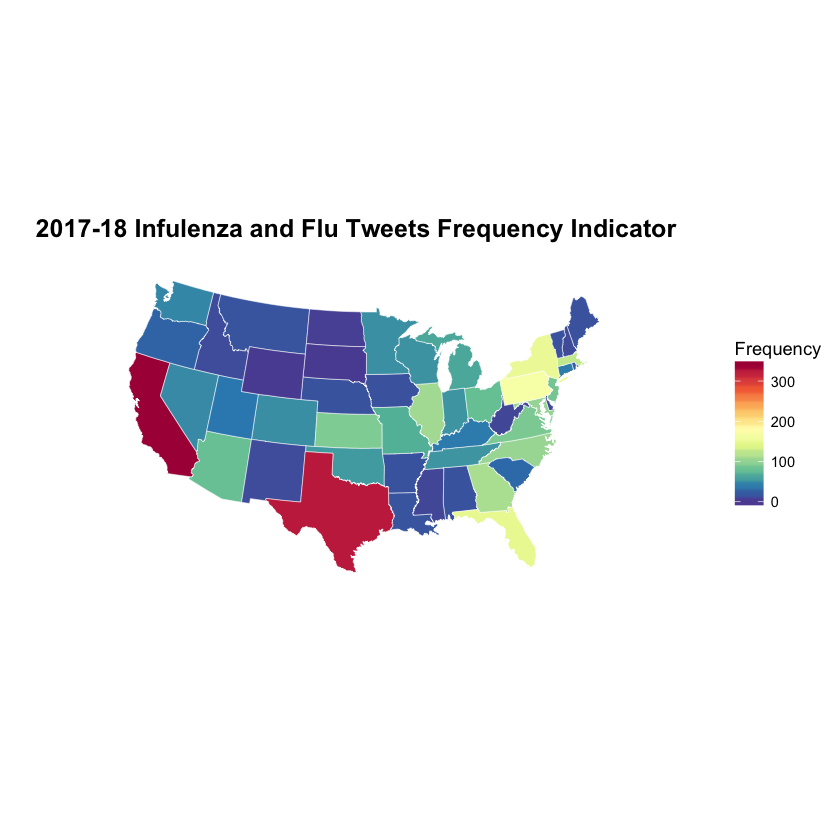

In [1]:
library(ggplot2)
library(maptools)
library(maps)
pFreqData <- read.csv(file="stateFreqDF.csv")
head(pFreqData)
library(RColorBrewer)

myPalette <- colorRampPalette(rev(brewer.pal(11, "Spectral")))
us <- map_data("state")
head(us)

gg <- ggplot()
gg <- gg + geom_map(data=us, map=us,aes(x = long, y = lat, map_id=region),
                    fill="#ffffff", color="#ffffff", size=1)
gg <- gg + geom_map(data=pFreqData, map=us,
                    aes(fill=Freq, map_id=pFreqData$usStatelocation),
                    color="#ffffff", size=0.15)
gg <- gg + labs(x="", y="", fill ="Frequency", title = "2017-18 Infulenza and Flu Tweets Frequency Indicator")
gg <- gg + coord_map("albers", lat0 = 39, lat1 = 45) 
gg <- gg + theme(panel.border = element_blank(), panel.background = element_blank(), axis.ticks = element_blank(),
                axis.text = element_blank(), plot.title = element_text(size = 15, face = "bold"))
gg <- gg + scale_fill_gradientn(colours = myPalette(300), limits=c(0,350))
gg
